### Bsc Computer Science 

### CM3015 Mechine Learning & Neural Networks

### Best Performing Mechine Learning Model on Lung Cancer Dataset

### 1. Introduction

### Domain-specific area

Cancer stands as a significant global health challenge, maintaining its position as a predominant cause of morbidity and mortality. In the United States alone, an estimated 1.9 million new cancer cases were diagnosed in 2022, resulting in 609,360 cancer-related deaths. Projections indicate that by 2040, the global burden of cancer is expected to surge to 28.0 million new cases and 16.2 million deaths, primarily attributed to population growth and aging.

Despite the perceived gravity of cancer, it is essential to recognize its preventability and treatability, particularly in its early stages. Early cancer detection is closely associated with higher survival rates, reduced mortality, and lower treatment costs. Early-stage cancers often necessitate less complex and more cost-effective treatments compared to advanced stages. However, challenges such as a lack of awareness, delayed medical attention, and unforeseen appointment issues contribute to late-stage diagnoses.

Screening emerges as a crucial tool for detecting pre-cancer conditions, facilitating early diagnosis before symptoms manifest. Symptoms tend to appear at advanced stages, emphasizing the importance of proactive screening. Regular checkups play a pivotal role, but many individuals may not prioritize them, especially in the absence of noticeable symptoms. A predictive model could offer a cost-effective solution, enabling individuals to assess their future risk of cancer based on past patients' symptoms. Such a model could streamline the diagnosis process, empower patients with knowledge about potential risk factors, and ultimately reduce instances of late-stage cancer diagnoses.

### Objectives

The primary objective of this project is to develop a user-friendly system that enables individuals to assess their potential risk of developing lung cancer in the future. The key outcome is to create an accessible platform where users can respond to questions related to their symptoms, providing a preliminary estimate of their cancer risks. This initiative aims to offer a rapid and cost-effective method for predicting cancer susceptibility, promoting increased awareness of health risks among the general population.

### Aim 

The primary aim of this project is to systematically compare the performance of at least three machine learning algorithms on the selected dataset. This comprehensive comparison involves the implementation, training, and evaluation of the chosen algorithms to gain insights into their predictive capabilities.


## 2. Dataset Description

## 2. Dataset Description

The dataset selected for this project originates from Kaggle, providing a rich source of information obtained through surveys conducted with patients, encompassing both those diagnosed with lung cancer and those without. Due to constraints in accessing patient data from my home country, Singapore, the decision was made to utilize this lung cancer dataset. The dataset is structured in a CSV file format, comprising 16 columns that encompass basic patient details such as gender and age, along with common symptoms associated with lung cancer, ultimately indicating whether a patient has been diagnosed with the condition.

In total, the dataset contains 309 entries, each representing a patient surveyed for the study. The majority of the data, particularly symptom-related information, is encoded with boolean values, utilizing 1 for "No" and 2 for "Yes." To enhance the dataset's clarity and usability, necessary data preprocessing steps will be implemented. This includes the removal of duplicate entries and the transformation of boolean values to a more intuitive representation, such as "YES"/"NO" or 0/1.

Despite the relatively modest number of entries, the dataset's richness lies in the diversity of symptoms available. This diversity ensures the functionality of the model produced. Preceding the training of the prediction model, a meticulous data cleaning process will be executed. Visualization plots will be employed to aid in comprehending the dataset's nuances and the relationship of each symptom to lung cancer.

The culmination of this project involves an in-depth evaluation of the model's accuracy, providing insights into its predictive capabilities and its potential to identify symptoms indicative of a higher risk of developing lung cancer in the future.

Link to dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer



## 3. Data Preparation 

### 3.1 Importing Dependencies

In [1]:
# Data manipulation and analysis
import pandas as pd                # For data manipulation and analysis using DataFrames
import numpy as np                 # For numerical operations

# Data visualization
import matplotlib.pyplot as plt    # For creating static, interactive, and animated visualizations
import seaborn as sns              # For statistical data visualization based on matplotlib

from sklearn.preprocessing import LabelEncoder

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.linear_model import LogisticRegression

# Split the data into a training set and a test set using train_test_split
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Additional imports for classification reports
from sklearn.metrics import classification_report

# Additional imports for cross-validation scores
from sklearn.model_selection import cross_val_score

# Remove unnecessary repetitions

# Additional imports for classification reports
from sklearn.metrics import classification_report


### 3.2 Importing Raw Data

In [2]:
# Load the raw dataset
rawData = pd.read_csv('LungCancer.csv')

We have loaded the CSV file and we can now perform preliminary exploration so as to understand the structure and characteristics of the dataset.

### 3.3 Exploring Raw Data

In [3]:
# Display the dataset
rawData.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Get information about the dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Generate descriptive statistics of the dataset
rawData.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### 3.4 Data Cleaning and Preprocessing

### Handling Missing Values 

In [6]:
# Get information on Missing Values
rawData.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

The dataset is clean, with no missing values, allowing for a reliable analysis.

### Handling Duplicate Values 

In [7]:
# Identify duplicates 
rawData.duplicated().sum()

33

In [8]:
# Remove whitespaces from column names
rawData.columns = rawData.columns.str.strip()

In [9]:
# Drop rows with duplicate valeus 
rawData.drop_duplicates(inplace=True)

# Get information about the dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

Duplicate entries were identified and removed, resulting in a cleaner dataset with 276 entries

### Creating a New DataFrame

In [10]:
# Create a new DataFrame
newData = rawData.copy()

# replaces each column that is represented with 1 and 2, to NO and YES
for col in newData.columns:
    newData[col] = newData[col].replace({1 : "NO" , 2 : "YES"})
    
# Display the dataset
newData.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


Initial exploration shows a variety of symptoms represented by boolean values. These will be transformed into more interpretable labels (NO and YES) for better understanding and model training.


The analysis lays the groundwork for further exploration, visualization, and the development of a predictive model to assess the risk of lung cancer based on symptoms.

## 4. Exploratory Data Analysis (EDA)

The next phase involves exploratory data analysis (EDA) and visualization to gain deeper insights into the distribution of symptoms and their correlation with lung cancer. These insights will guide the creation and evaluation of a machine learning model for predicting lung cancer risk.

### Nominal Data Visualization

The 'Value Counts for Nominal Columns' plot serves as a foundation for further analysis, enabling the identification of potential patterns or correlations that may be indicative of lung cancer risk.

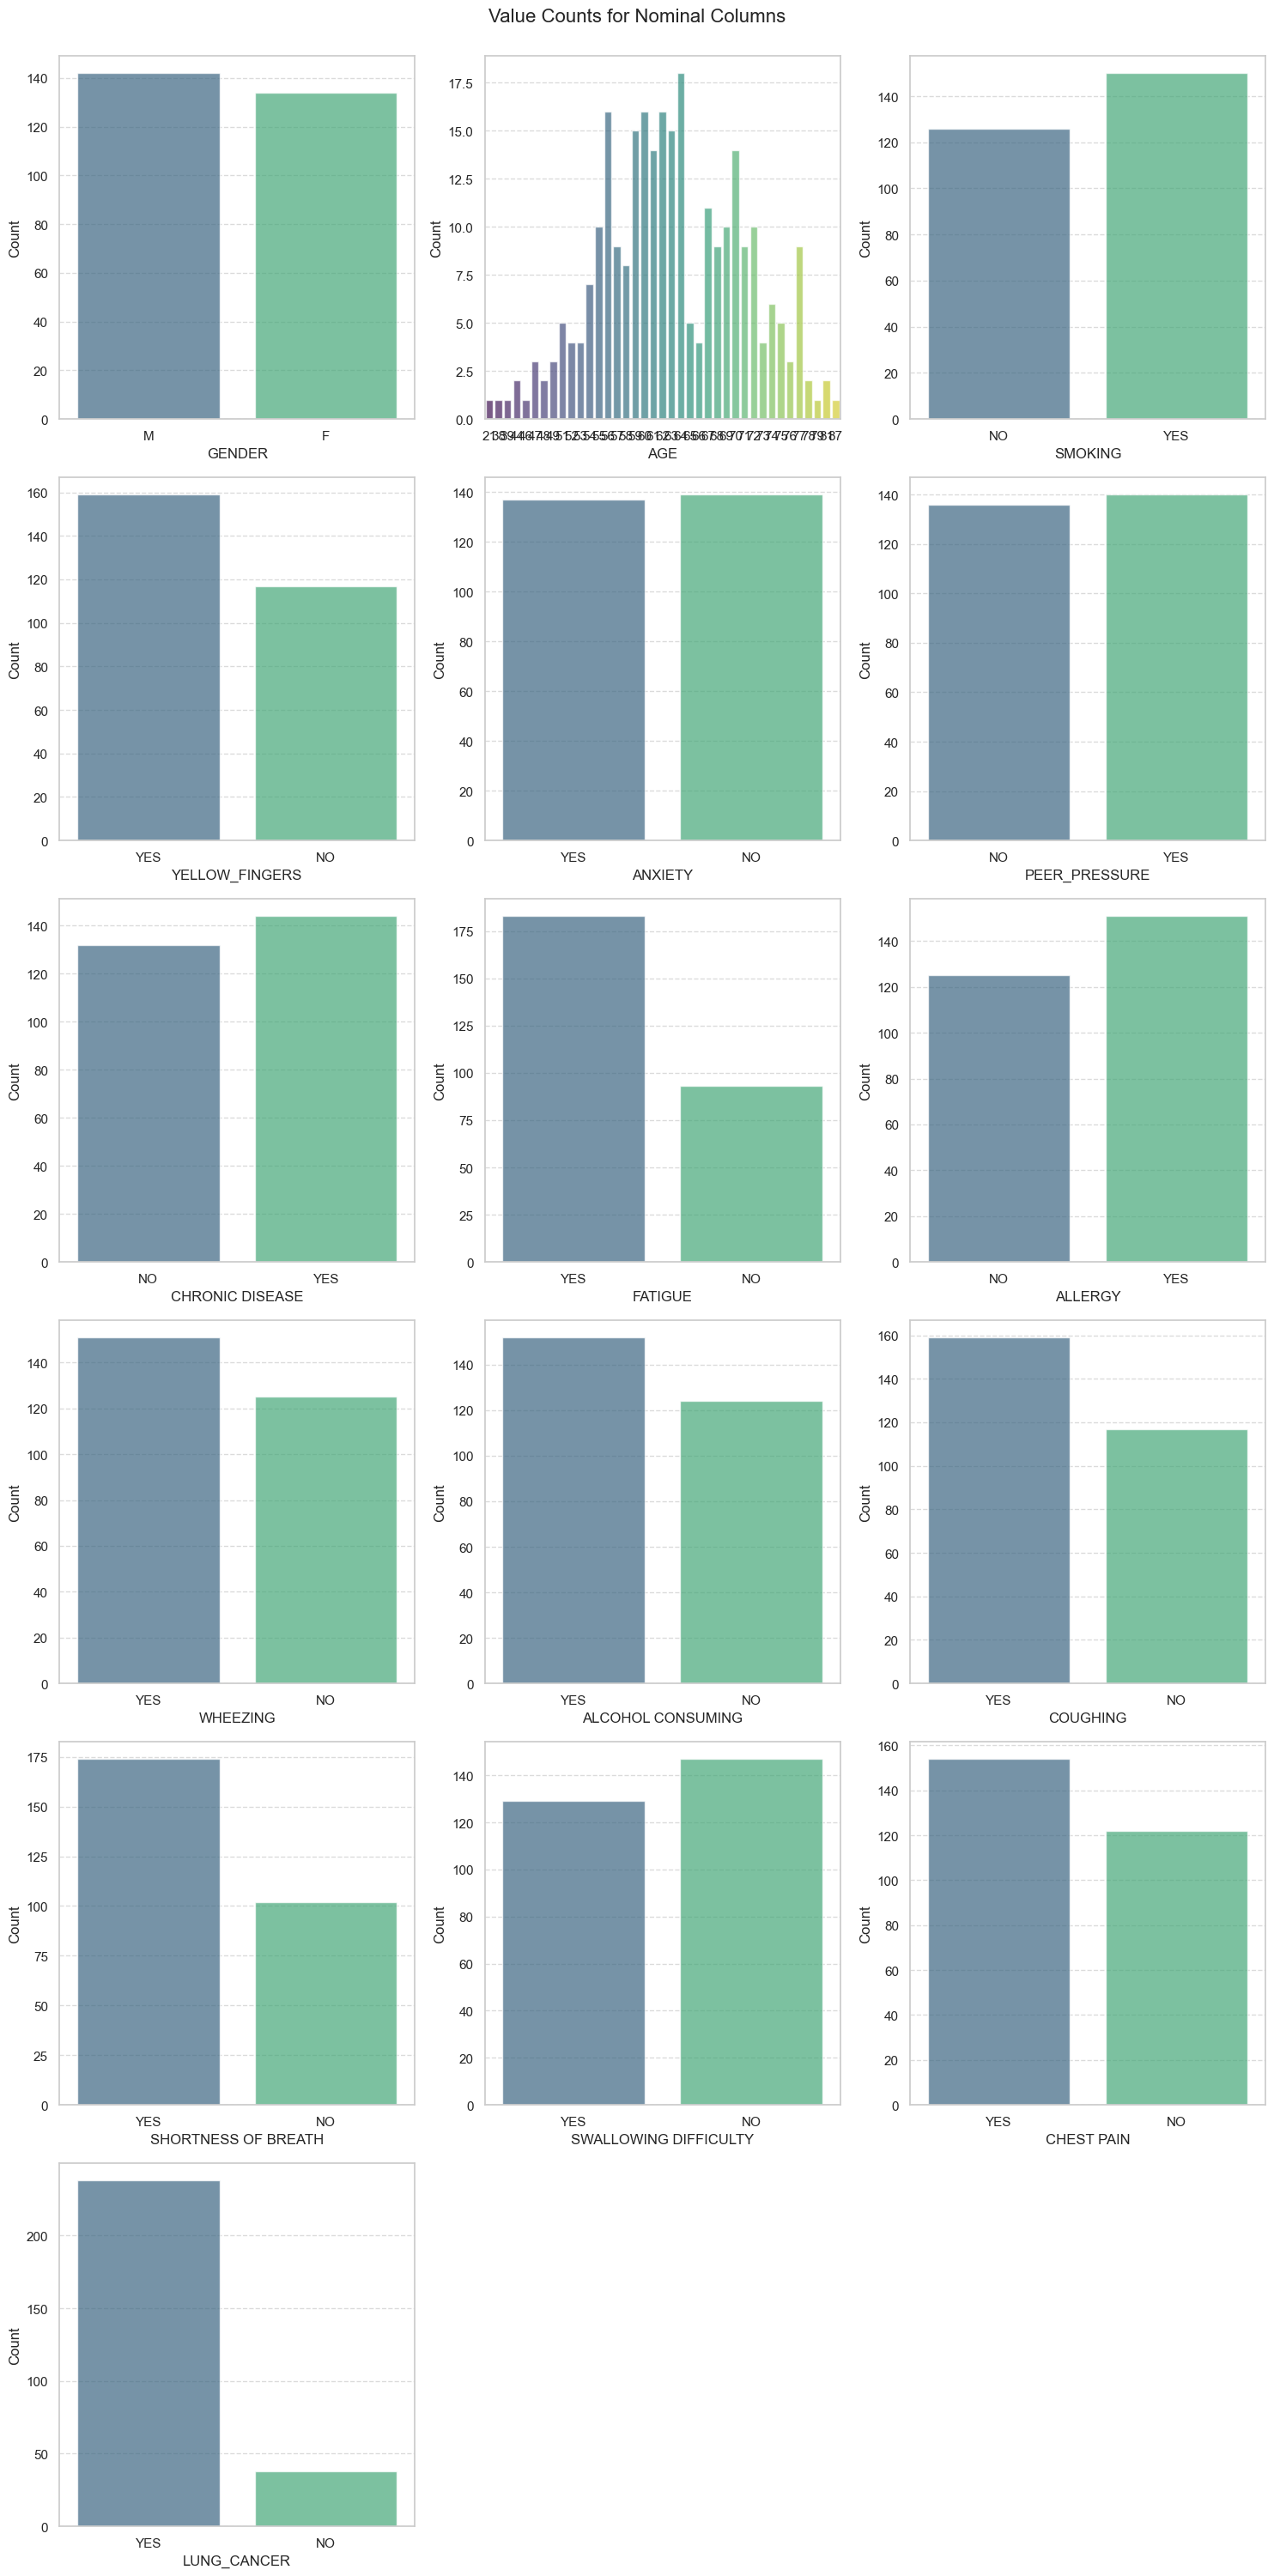

In [11]:
# Set the style for a cleaner look
sns.set(style="whitegrid")

# Define the number of subplots based on the number of columns
num_columns = len(newData.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Adjusted for three columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
fig.suptitle('Value Counts for Nominal Columns', fontsize=16, y=1.00)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Define the 'veridis' color palette for each column
column_palette = 'viridis'

# Iterate over each column and plot the value counts with the 'veridis' palette
for i, col in enumerate(newData.columns):
    sns.countplot(x=col, data=newData, ax=axes[i], palette=column_palette, alpha=0.7)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


With the help of the above visualizations, we con now further analyze based on the individual attributes of the lung cancer dataset. 

### 4.1 Analyzing the Variable: 'Age'

The descriptive statistics for the 'AGE' column. 

In [12]:
# Descriptive statistics for the 'AGE' column
newData['AGE'].describe()

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

he mean age indicates the central tendency of the data, while the standard deviation measures the amount of variation or dispersion. 

The majority of individuals fall between the ages of 57.75 and 69, as indicated by the interquartile range (IQR).

The dataset's age distribution is right-skewed, with a higher concentration of individuals in the older age groups.

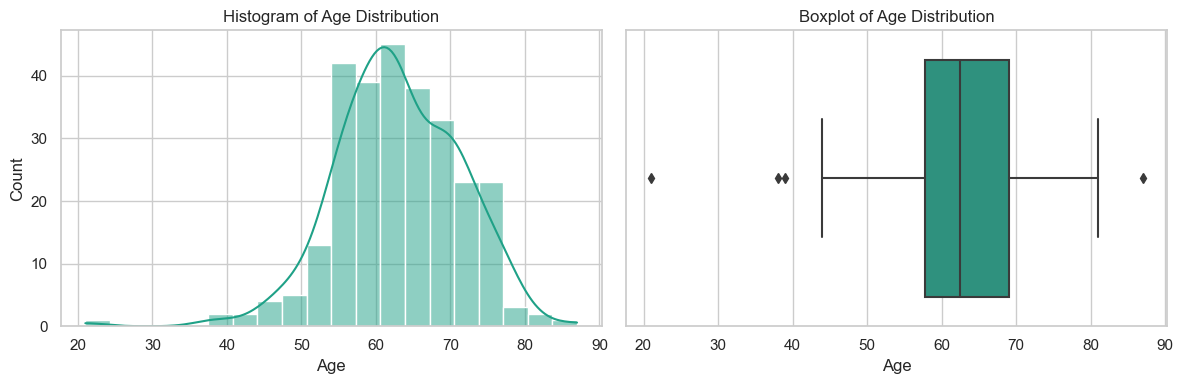

In [13]:
# Choose a specific color from the 'viridis' palette
custom_color = sns.color_palette('viridis')[3]

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(data=newData, x='AGE', color=custom_color, kde=True)
plt.xlabel('Age')
plt.title('Histogram of Age Distribution')

# Subplot 2: Boxplot of 'AGE'
plt.subplot(1, 2, 2)
sns.boxplot(data=newData, x='AGE', color=custom_color)
plt.xlabel('Age')
plt.title('Boxplot of Age Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The age distribution is right-skewed, indicating that a majority of individuals in the dataset are older.

The boxplot confirms the right-skewed nature of the age distribution.

The boxplot also identifies potential outliers, individuals with ages significantly higher than the majority.

The age distribution provides valuable insights into the demographics of the dataset.

Older individuals are more prevalent, which aligns with the common occurrence of lung cancer in older age groups.

### Outliers Handling

In [14]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1

    # Define lower and upper limits to filter outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Filter the data and keep only values within the specified range
    data_no_outliers = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

    return data_no_outliers

The above code provides a reusable way to remove outliers from a specified column in a DataFrame using the IQR method.

In [15]:
# Apply the function to remove outliers from the 'AGE' column in the 'data' DataFrame
newData = remove_outliers_iqr(newData, 'AGE')

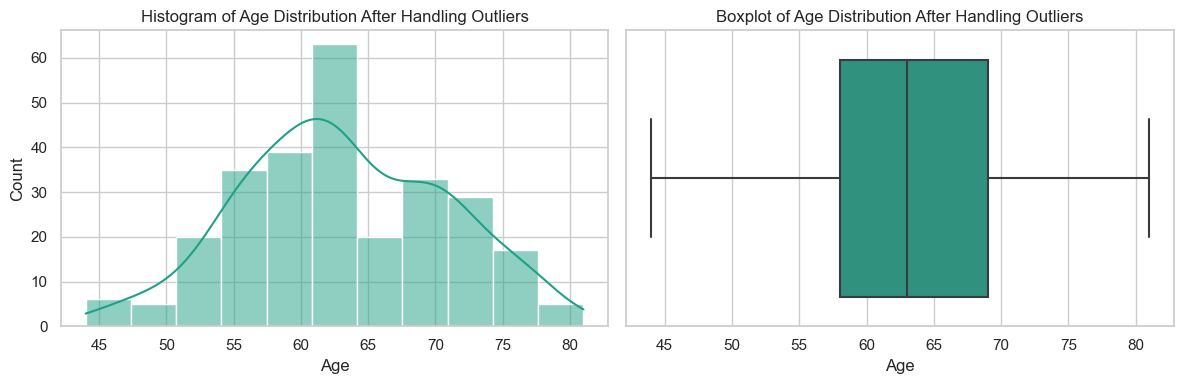

In [16]:
# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(data=newData, x='AGE', color=custom_color, kde=True)
plt.xlabel('Age')
plt.title('Histogram of Age Distribution After Handling Outliers')

# Subplot 2: Boxplot of 'AGE'
plt.subplot(1, 2, 2)
sns.boxplot(data=newData, x='AGE', color=custom_color)
plt.xlabel('Age')
plt.title('Boxplot of Age Distribution After Handling Outliers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


It can be obeserved after removing outliers that, the data points are now more closely packed around the mean, reflecting a decrease in variability.

Outlier handling led to a more robust and less skewed distribution, emphasizing a tighter grouping of ages around the center.

### 4.2 Analyzing the Variable: 'Lung_Cancer'

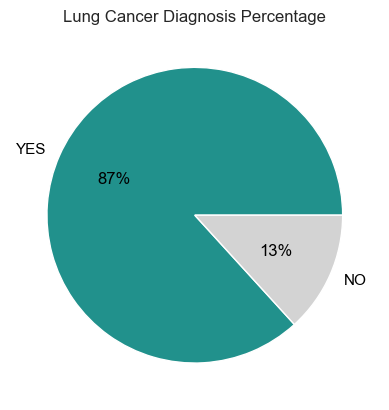

In [17]:
# Define data
diagnosis_counts = newData['LUNG_CANCER'].value_counts()
labels = ['YES', 'NO']

# Choose a lighter color from the 'viridis' palette
custom_color = sns.color_palette('viridis', n_colors=3)[1]

# Create pie chart with black percentage text on a light color background
plt.pie(diagnosis_counts, labels=labels, colors=[custom_color, 'lightgray'], autopct='%.0f%%', textprops={'color': 'black'})
plt.title(label="Lung Cancer Diagnosis Percentage")

# Display the plot
plt.show()


The pie chart illustrates the distribution of lung cancer diagnoses in the dataset.

Approximately 86% of cases are diagnosed with lung cancer ('YES'), while the remaining 14% are not diagnosed ('NO').

### 4.2.1 Relationship Between Symptomatic Features and Lung Cancer

In this section, we explore the relationship between various symptomatic features and the occurrence of lung cancer. 

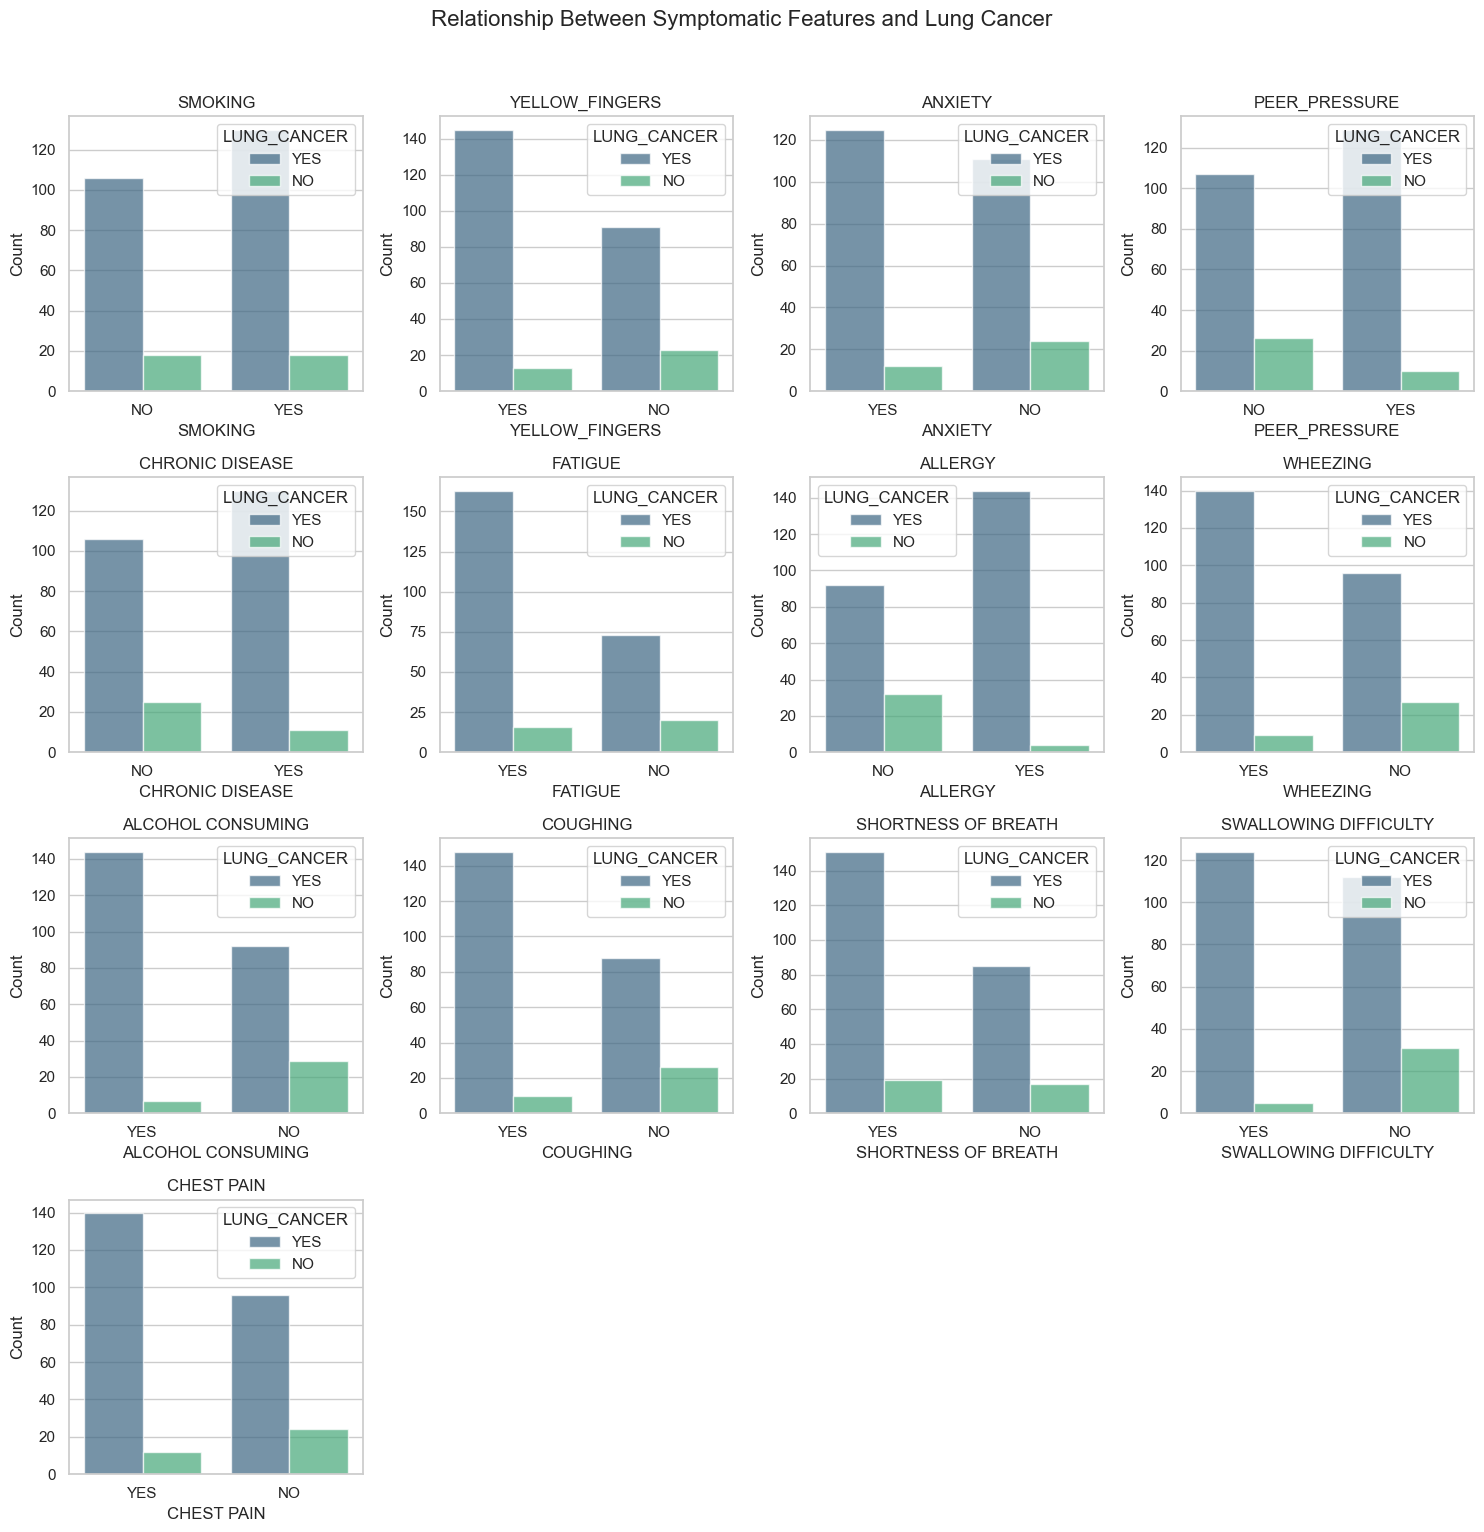

In [18]:
# List of symptomatic features (replace with actual column names)
symptomatic_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
                        'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                        'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Create subplots for each symptomatic feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Relationship Between Symptomatic Features and Lung Cancer', fontsize=16, y=1.02)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Iterate over each symptomatic feature and plot stacked bar chart
for i, symptomatic_feature in enumerate(symptomatic_features):
    sns.countplot(x=symptomatic_feature, hue='LUNG_CANCER', data=newData, ax=axes[i], palette='viridis', alpha=0.7)
    axes[i].set_ylabel('Count')
    axes[i].set_title(symptomatic_feature)

# Remove empty subplots
for i in range(len(symptomatic_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


### 4.2.2 Analyzing Positive Lung Cancer Cases by Age and Gender

### Separation of Data

In [19]:
# seperate dataframe into two based on positive and negative diagnosis
data_pos=newData[newData['LUNG_CANCER'] == "YES"]
data_neg=newData[newData['LUNG_CANCER'] == "NO"]

In this step, the dataset has been divided into two distinct dataframes to facilitate a focused analysis of cases with positive and negative lung cancer diagnoses.

### Positive Lung Cancer Cases By Age and Gender

Two separate histograms are presented for males and females, providing insights into the age distribution of individuals diagnosed with lung cancer.

 This analysis aims to discern any notable patterns or trends in the age distribution for both males and females with a positive lung cancer diagnosis.

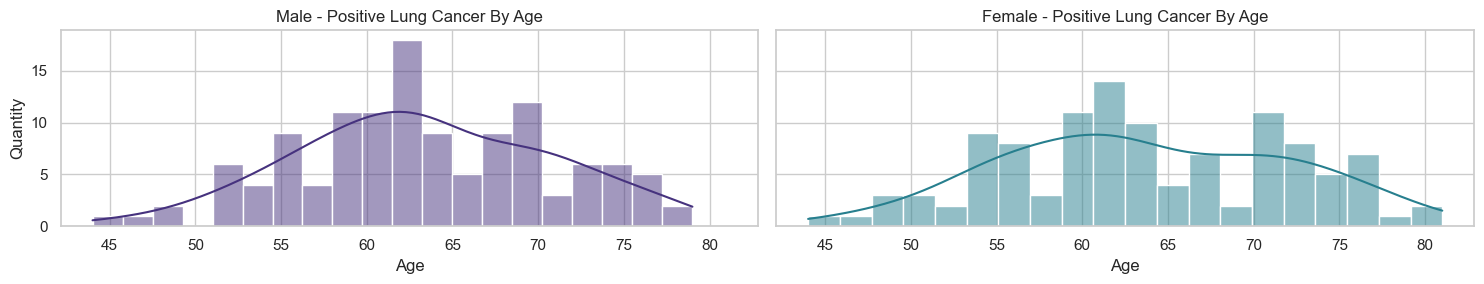

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3), sharex=True, sharey=True)

# Plot first histogram for Male
sns.histplot(data_pos[data_pos["GENDER"]=="M"]["AGE"], kde=True, color=sns.color_palette('viridis')[0], bins=20, ax=axes[0])
axes[0].set_title("Male - Positive Lung Cancer By Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Quantity")

# Plot second histogram for Female
sns.histplot(data_pos[data_pos["GENDER"]=="F"]["AGE"], kde=True, color=sns.color_palette('viridis')[2], bins=20, ax=axes[1])
axes[1].set_title("Female - Positive Lung Cancer By Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Quantity")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The histogram for males with positive lung cancer suggests a relatively symmetrical distribution centered around the age of 63. The majority of cases fall within the range of 58 to 69 years.

The histogram for females with positive lung cancer shows a similar distribution to males, centered around the age of 63. The majority of cases also fall within the range of 57 to 70 years.

### Combined Plots for Positive Lung Cancer Cases by Age and Gender

he combined plot consolidates the information, displaying the distribution of positive lung cancer cases by age for both genders.

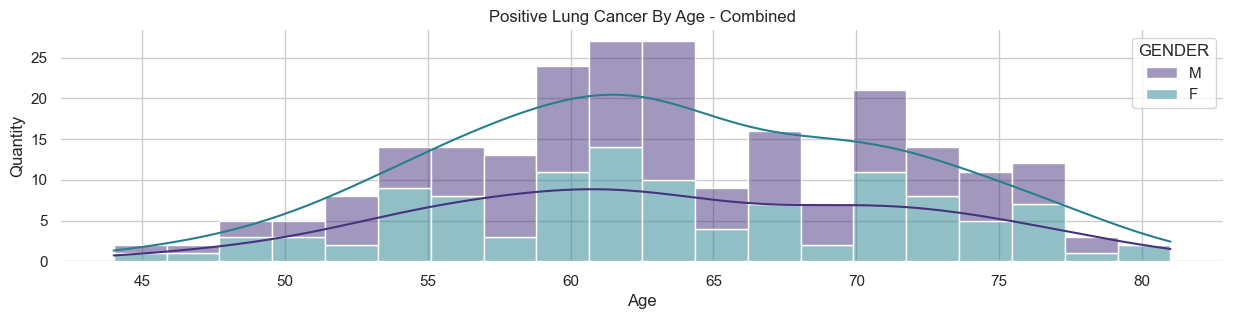

In [21]:
# Create a combined plot
plt.subplots(figsize=(15, 3))

# Plot a histogram with KDE for positive lung cancer cases, combining both genders
p = sns.histplot(
    data=data_pos,              # DataFrame containing the data
    x="AGE",                    # Column for x-axis (age)
    hue="GENDER",               # Column for color differentiation (gender)
    palette={'M': sns.color_palette('viridis')[0], 'F': sns.color_palette('viridis')[2]},  # Color palette for males (M) and females (F)
    multiple="stack",           # Stack histograms for each gender
    kde=True,                   # Show Kernel Density Estimate (KDE) on top of the histogram
    bins=20                      # Number of bins for the histogram
)

# Customize the line colors to match the specified palette
p.axes.lines[0].set_color(sns.color_palette('viridis')[0])  # Male color
p.axes.lines[1].set_color(sns.color_palette('viridis')[2])  # Female color

# Set plot title
p.axes.set_title("Positive Lung Cancer By Age - Combined")

# Set y-axis label
plt.ylabel("Quantity")

# Set x-axis label
plt.xlabel("Age")

# Remove spines on the left and bottom for a cleaner look
sns.despine(left=True, bottom=True)

# Show the combined plot
plt.show()


Both distributions exhibit variability in counts across different ages, indicating that positive lung cancer cases are not evenly distributed across the entire age spectrum.

Both genders have relatively higher counts in the age range of approximately 59 to 64.

The differences in peak ages and minor variations in the age distribution may suggest potential gender-specific patterns or factors influencing the occurrence of positive lung cancer cases.

### Gender Comparison with Symptoms for Positive Lung Cancer Cases

The series of histograms below provides a comparative analysis of symptoms among males and females diagnosed with positive lung cancer.

Each histogram represents a specific symptom, with the count of cases categorized by gender.

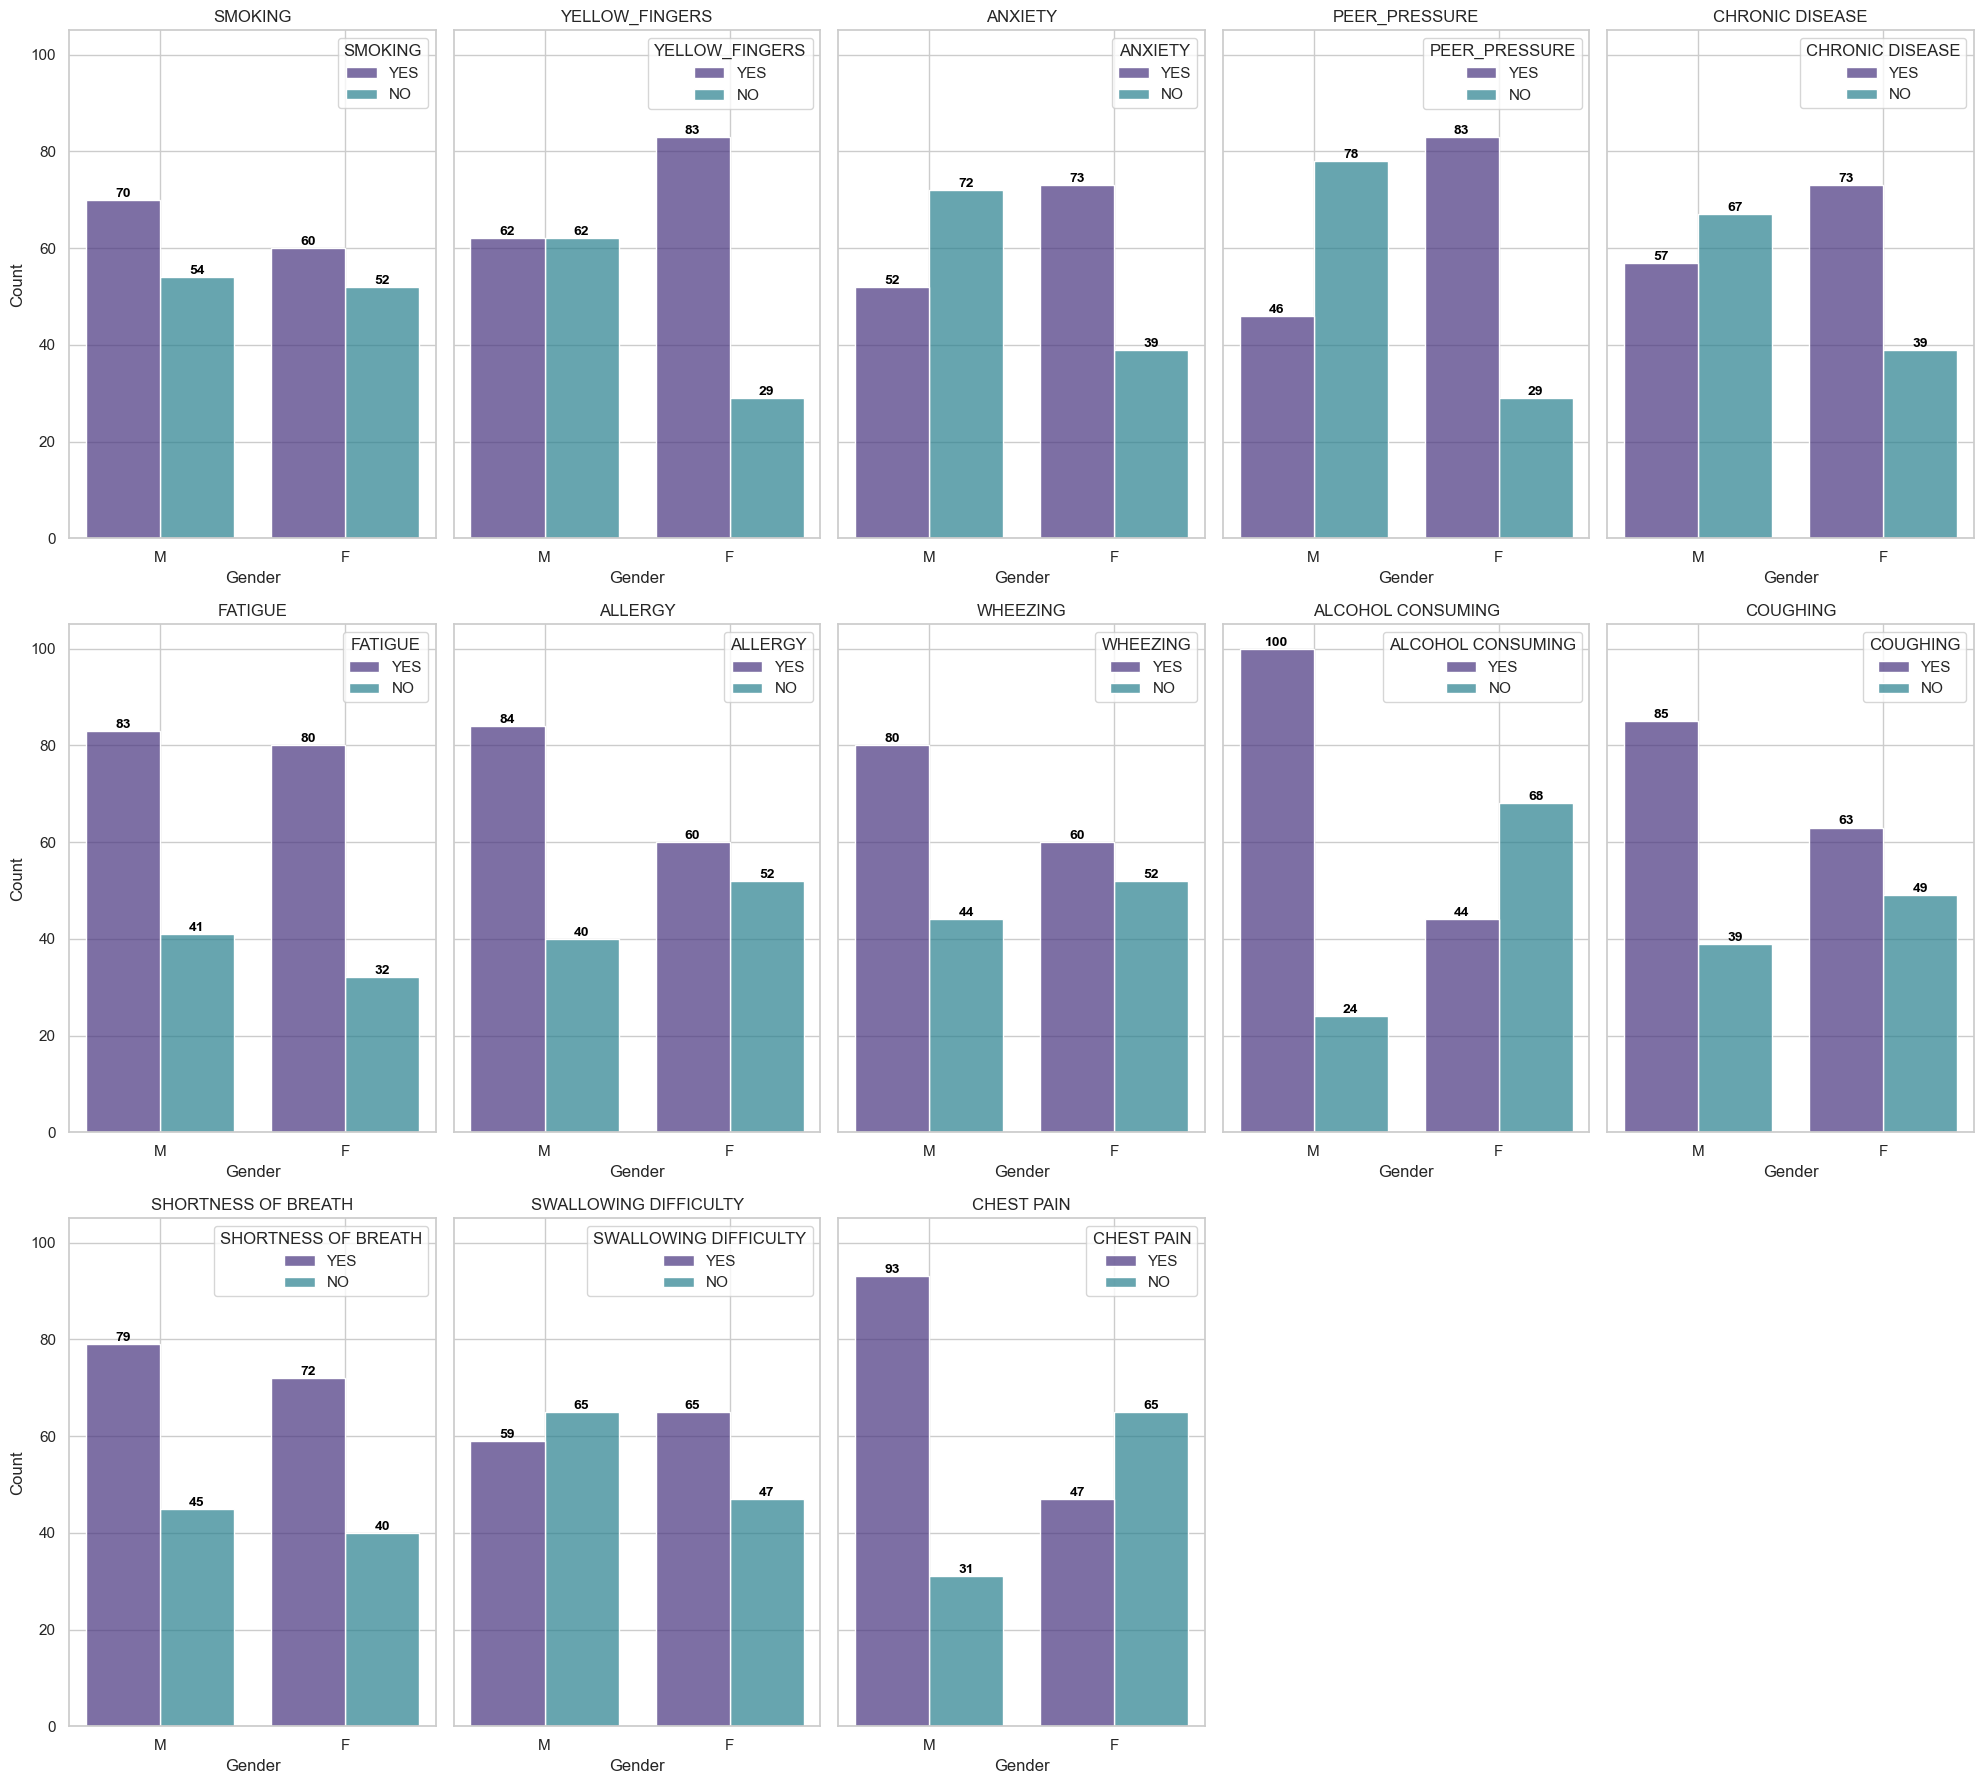

In [22]:
# Assuming 'GENDER' is a column in your data_pos dataframe
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 18), sharey=True)
axes = axes.reshape(15)

# Remove the columns that are not symptoms
data_pos_temp = data_pos.copy().drop(columns=['GENDER', 'AGE', 'LUNG_CANCER'])

# Set the color palette to use
palette = [sns.color_palette('viridis')[0], sns.color_palette('viridis')[2]]  # Using 'viridis' palette for Male and Female

# For each column, plot a histogram
for i, col in enumerate(data_pos_temp.columns):
    # Plot the histogram with alpha parameter
    ax = sns.histplot(ax=axes[i], data=data_pos, x="GENDER", hue=col, hue_order=["YES", "NO"],
                      palette=palette, multiple="dodge", shrink=0.8, alpha=0.7)

    # Set the title of each histogram to the col name (symptoms)
    ax.set_title(col)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Count")

    # Show the value for each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", size=10, color="black", weight='bold')

# Off the axis of the 2 extra plots
axes[13].set_axis_off()
axes[14].set_axis_off()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### 4.3 Data Encoding Using LabelEncoder

To facilitate the application of machine learning algorithms, categorical variables need to be encoded into numerical format. 

Here, the LabelEncoder from the scikit-learn library is used to convert 'YES' and 'NO' into 1 and 0, respectively, in all columns.

In [23]:
# Make a copy of the dataset
dataset_temp = newData.copy()

# Use LabelEncoder to encode "YES" and "NO" in all columns
label_encoder = LabelEncoder()

for col in dataset_temp.columns:
    dataset_temp[col] = label_encoder.fit_transform(dataset_temp[col])

# Display the updated dataset
dataset_temp


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,23,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,28,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,13,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,17,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,17,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,13,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,13,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,9,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0


Now, the entire dataset is numerically encoded, making it suitable for various machine learning algorithms that require numerical input.

The 'LUNG_CANCER' column is the target variable, and the other columns represent the features for predicting lung cancer.

### 4.4 Correlation Analysis

Now that we have numerically encoded our dataset, we can proceed with the correlation analysis. 

First, we'll calculate the correlation coefficients between each feature and the target variable 'LUNG_CANCER'. 

Then, we'll generate a heatmap to visualize the pairwise feature correlations.

### Correlation with Target Variable

Features with higher absolute correlation coefficients are more influential in predicting lung cancer.

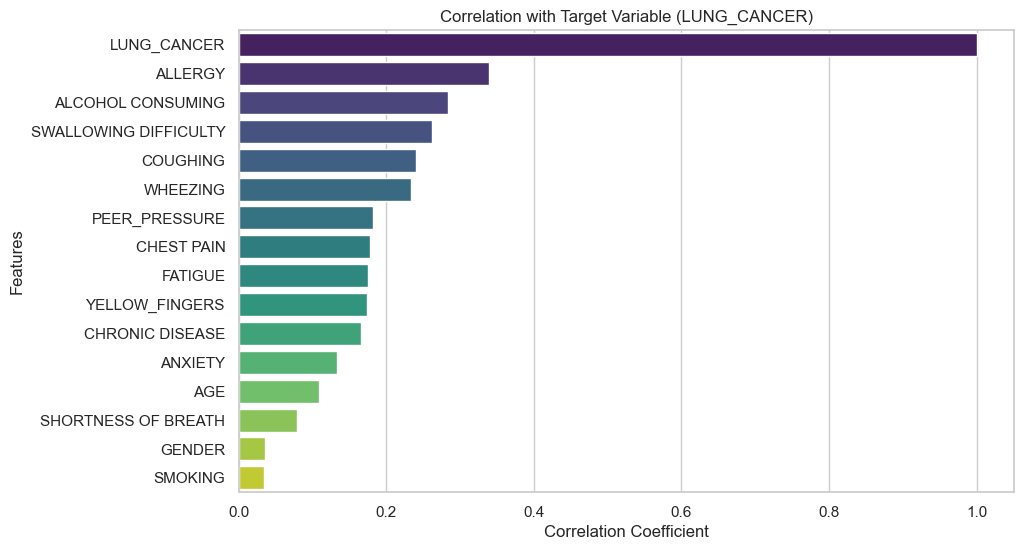

In [24]:
# Calculate correlation coefficients between features and target variable
correlation_matrix = dataset_temp.corr()
correlation_with_target = correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)

# Plot correlation coefficients with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation with Target Variable (LUNG_CANCER)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


The barplot provides a visual representation of how each feature correlates with the target variable ('LUNG_CANCER').

#### Strong Positive Correlations:
ALLERGY: Individuals with allergies have a relatively higher likelihood of being diagnosed with lung cancer. 

ALCOHOL CONSUMING: There is a positive correlation between alcohol consumption and lung cancer. This aligns with established knowledge that excessive alcohol use can contribute to various health issues, including an increased risk of certain cancers.

SWALLOWING DIFFICULTY: Swallowing difficulty is positively correlated with lung cancer. This might indicate that individuals experiencing swallowing difficulties could have a higher probability of having lung cancer.

#### Weak Positive Correlations:

FATIGUE (0.175908), YELLOW_FINGERS (0.173962), CHRONIC DISEASE (0.166359), ANXIETY (0.133064). 

These features exhibit weak positive correlations. While individually weak, they contribute to the overall understanding of factors associated with lung cancer.

#### Weak to No Correlations:

AGE (0.108581), SHORTNESS OF BREATH (0.078434), GENDER (0.036082), SMOKING (0.034597). 

These features have weak correlations with lung cancer. Age, gender, and smoking, though commonly associated with lung cancer risk, show relatively weaker linear correlations in this dataset.

Hence, It can be concluded that the features with weak to no correlations can be dropped and they are,  "GENDER", "SMOKING", "SHORTNESS OF BREATH" and "AGE"

### Pairwise Feature Correlation Heatmap

Next, let's create a heatmap to visualize the pairwise correlation between all features:

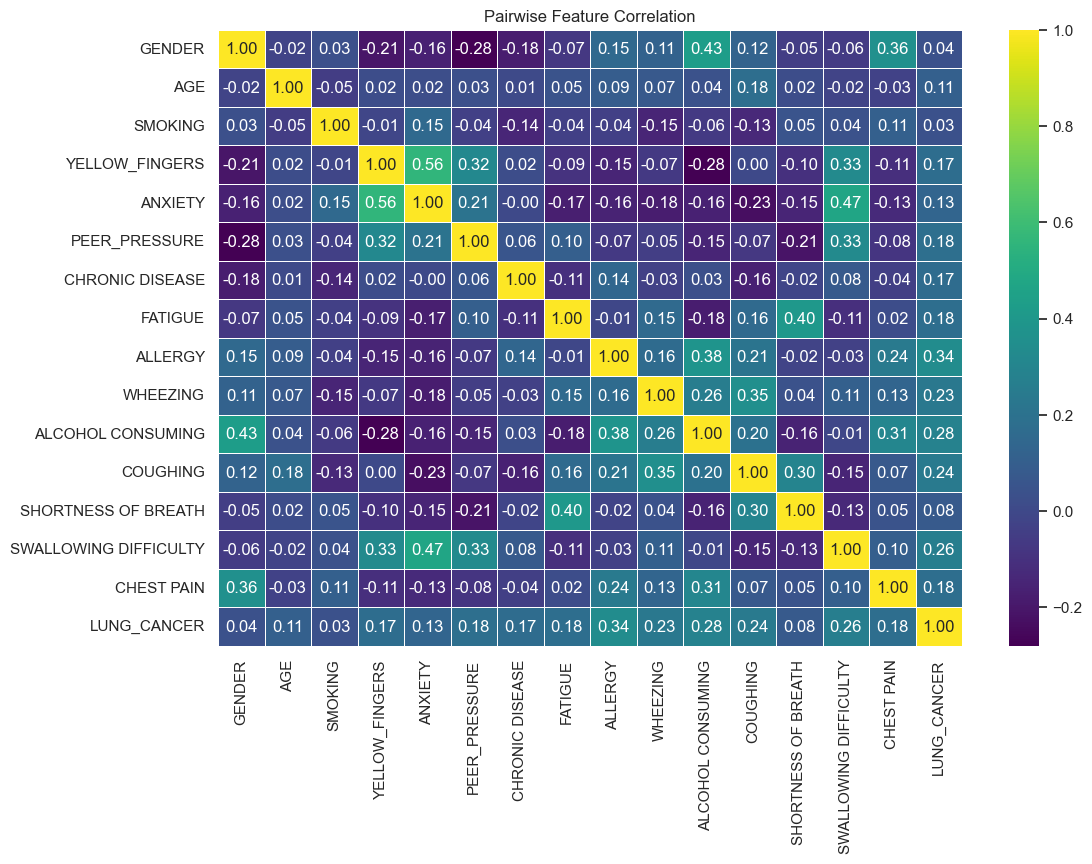

In [25]:
# Plot heatmap for pairwise feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Pairwise Feature Correlation')
plt.show()

The heatmap illustrates the pairwise correlation coefficients between all features in the dataset.

Correlation with Lung Cancer: YELLOW_FINGERS (0.17), ANXIETY (0.13), and PEER_PRESSURE (0.18) show positive correlations with LUNG_CANCER, indicating that individuals with these characteristics may have a higher likelihood of being diagnosed with lung cancer.
Weak Correlations:

Features like GENDER, SMOKING, and SHORTNESS OF BREATH have relatively weak correlations with LUNG_CANCER. While GENDER and SMOKING have some correlations with other features, SHORTNESS OF BREATH does not show strong correlations with other symptoms.

### Pairwise Feature Correlation Heatmap : Absolute Value >= 0.4

The heatmap now displays only correlations with an absolute value greater than or equal to 0.4.

Features with relatively strong positive correlations are highlighted, providing a clearer view of the most influential relationships in the dataset.

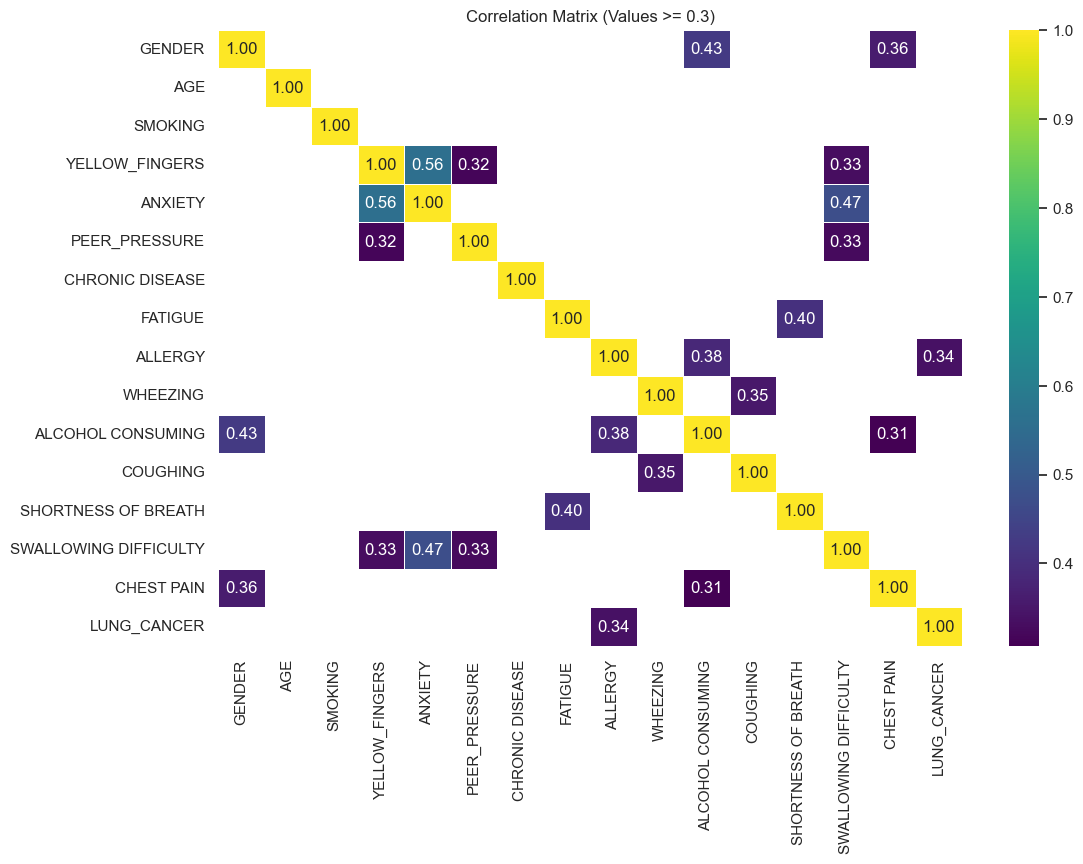

In [26]:
# Show heatmap values that have a value of >= 0.30
kot = correlation_matrix[correlation_matrix >= 0.3]

# Set the style and color theme
sns.set_theme(style="white")
cmap = sns.color_palette("viridis", as_cmap=True)

# Plot heatmap for pairwise feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(kot, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Values >= 0.3)')
plt.show()


From the above generated heatmap, we can observe that, YELLOW_FINGERS and ANXIETY (0.56) have a Strong positive correlation suggesting that individuals experiencing anxiety are more likely to have yellow fingers.

In order to not affect the accuray of the model, we will drop one of the feature - 'ANXIETY'. 

Having carried out various statistical and Visualization analysis on the Lung Cancer Dataset, It can be concluded that some of the features need to be dropped. 

These features are, "GENDER", "SMOKING", "SHORTNESS OF BREATH", "AGE", and "ANXIETY".

In [27]:
# Features to be dropped
features_to_drop = ["GENDER", "SMOKING", "SHORTNESS OF BREATH", "AGE", "ANXIETY"]

# Drop the specified features from the DataFrame
dataset_temp = dataset_temp.drop(features_to_drop, axis=1)

In [28]:
# Create a new DataFrame 'modelData' by making a copy of the modified DataFrame 'dataset_temp'
modelData = dataset_temp.copy()

# Display the contents of the 'modelData' DataFrame
modelData


,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0,0,1,0,1,1,1,1,1,1
1,0,0,1,1,1,0,0,0,1,1,1
2,0,1,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,0,0,1,1,0,1,1,0,1
280,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,1,1,0,0,0,0,1,0
282,1,0,0,0,0,0,0,0,1,1,0


### 5. Mechine Learning Model

### 5.1 Data Overview

In [29]:
# Display information about the 'modelData' DataFrame
modelData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 283
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         272 non-null    int32
 1   PEER_PRESSURE          272 non-null    int32
 2   CHRONIC DISEASE        272 non-null    int32
 3   FATIGUE                272 non-null    int32
 4   ALLERGY                272 non-null    int32
 5   WHEEZING               272 non-null    int32
 6   ALCOHOL CONSUMING      272 non-null    int32
 7   COUGHING               272 non-null    int32
 8   SWALLOWING DIFFICULTY  272 non-null    int32
 9   CHEST PAIN             272 non-null    int32
 10  LUNG_CANCER            272 non-null    int32
dtypes: int32(11)
memory usage: 13.8 KB


The DataFrame now contains 272 entries and 11 columns, where the last column, 'LUNG_CANCER,' is the target variable. All columns have non-null values, and the data types are integers.

In [30]:
# Extract the features matrix (X) by removing the target variable ('LUNG_CANCER') column
X = modelData.drop("LUNG_CANCER", axis=1)

# Display the shape of the features matrix
X.shape

(272, 10)

The features matrix (X) is created by excluding the target variable ('LUNG_CANCER') from the 'modelData' DataFrame.

In [31]:
# Extract the target array (y) by selecting only the 'LUNG_CANCER' column
y = modelData["LUNG_CANCER"]

# Display the shape of the target array
y.shape


(272,)

The target array (y) is extracted by selecting only the 'LUNG_CANCER' column from the 'modelData' DataFrame.

### 5.2 Data Splitting

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Display information about the shapes of the training and test sets
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((190, 10), (82, 10), (190,), (82,))

The data is split into training and test sets using the train_test_split function from scikit-learn. 

The split is performed with a test size of 30% and a random seed for reproducibility.

These testing and training sets will be used to train models, predict, and calculate the models' accuracy.

We will be training a few models, using them to predict, testing their accuracy, and decide on a model that fits this dataset the most.

### 5.3 K-Nearest Neighbors Model - 86.59%

The code implements a K-Nearest Neighbors (KNN) model using scikit-learn. It creates the model, fits it to the training data, makes predictions on the test set, and calculates the accuracy of the model. 

In [33]:
#Create and train a model
KNearestNeighbors_model = KNeighborsClassifier(n_neighbors=2)
KNearestNeighbors_model.fit(Xtrain, ytrain)
KNearestNeighbors_preds = KNearestNeighbors_model.predict(Xtest)

#Evaluate the model
KNearestNeighbors_accuracy_score = round(accuracy_score(ytest, KNearestNeighbors_preds)*100, ndigits = 2)
print(f"Accuracy of K-Nearest Neighbors Model: {KNearestNeighbors_accuracy_score} %")


Accuracy of K-Nearest Neighbors Model: 86.59 %


 The accuracy achieved is 86.59%.

### K-Nearest Neighbors Cross-Validation

Cross-validation scores for the KNN model are computed using the cross_val_score function with 5 folds. The cross-validation results are printed, showing the accuracy for each fold.

In [34]:
# Cross-validate the K-Nearest Neighbors model using 5 folds
KNearestNeighbors_cross_val = cross_val_score(KNearestNeighbors_model, X, y, cv=5)

# Display cross-validation scores for K-Nearest Neighbors
print("Cross-validation score of K-Nearest Neighbors Model:")

# Iterate over each cross-validation fold and print the accuracy scores
count = 0
for accuracy_score_fold in KNearestNeighbors_cross_val:
    count += 1
    print(f"{count}) {round(accuracy_score_fold * 100, ndigits=2)} %")


Cross-validation score of K-Nearest Neighbors Model:
1) 89.09 %
2) 80.0 %
3) 83.33 %
4) 83.33 %
5) 92.59 %


### K-Nearest Neighbors Classification Report

The code generates a classification report for the KNN model, including precision, recall, and F1-score for each class (0 and 1).

In [35]:
# Generate a classification report for the K-Nearest Neighbors model
KNearestNeighbors_classification_report = classification_report(ytest, KNearestNeighbors_preds)

# Print the K-Nearest Neighbors Classification Report
print(f"K-Nearest Neighbors Classification Report : \n{KNearestNeighbors_classification_report}")


K-Nearest Neighbors Classification Report : 
              precision    recall  f1-score   support

           0       0.44      0.78      0.56         9
           1       0.97      0.88      0.92        73

    accuracy                           0.87        82
   macro avg       0.70      0.83      0.74        82
weighted avg       0.91      0.87      0.88        82



The model exhibits higher performance for class 1 (patients with lung cancer) compared to class 0 (patients without lung cancer).

### 5.4 Gaussian Naive Bayes Model -  89.02%

A Gaussian Naive Bayes (GNB) model is implemented from scratch using a custom class. The code defines the class, fits the model to the training data, makes predictions on the test set, and calculates the accuracy of the model.

Cross-validation scores for the GNB model are computed using the custom perform_cross_validation function with 5 folds. The cross-validation results are printed, showing the accuracy for each fold.

In [36]:


class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        """
        Train the Gaussian Naive Bayes model.

        Parameters:
        - X: Features matrix (numpy array or pandas DataFrame)
        - y: Target array (numpy array or pandas Series)
        """
        self.classes = np.unique(y)  # Unique classes in the target array
        self.parameters = {}  # Dictionary to store mean and standard deviation for each class and feature

        # Calculate mean and standard deviation for each feature and class
        for c in self.classes:
            X_class = X[y == c]
            self.parameters[c] = {
                'mean': X_class.mean(axis=0),
                'std': X_class.std(axis=0) + 1e-8  # Add a small constant to avoid division by zero
            }

    def calculate_probability(self, x, mean, std):
        """
        Calculate the probability of a given value using the Gaussian distribution.

        Parameters:
        - x: Value for which probability is calculated
        - mean: Mean of the distribution
        - std: Standard deviation of the distribution

        Returns:
        - Probability of the given value
        """
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def predict_sample(self, sample):
        """
        Predict the class of a single sample.

        Parameters:
        - sample: Input sample (numpy array or pandas Series)

        Returns:
        - Predicted class
        """
        class_probabilities = []

        # Calculate class probabilities for the given sample
        for c in self.classes:
            len_X_c = len(y[y == c])
            class_probability = np.log(len_X_c / len(y))  # Log prior probability
            for feature, value in zip(sample, self.parameters[c]['mean']):
                likelihood = self.calculate_probability(value, self.parameters[c]['mean'][feature],
                                                        self.parameters[c]['std'][feature])
                class_probability += np.log(likelihood + 1e-8)  # Add a small constant to avoid log(0)

            class_probabilities.append(class_probability)

        # Return the class with the highest probability
        return self.classes[np.argmax(class_probabilities)]

    def predict(self, X):
        """
        Predict the classes for multiple samples.

        Parameters:
        - X: Features matrix (numpy array or pandas DataFrame)

        Returns:
        - Predicted classes (numpy array)
        """
        predictions = [self.predict_sample(sample) for sample in X.values]
        return np.array(predictions)

    def score(self, X, y, sample_weight=None):
        """
        Compute the accuracy of the Gaussian Naive Bayes model.

        Parameters:
        - X: Features matrix (numpy array or pandas DataFrame)
        - y: Target array (numpy array or pandas Series)
        - sample_weight: Sample weights (optional)

        Returns:
        - Accuracy score
        """
        predictions = self.predict(X)
        return accuracy_score(y, predictions, sample_weight=sample_weight)

def perform_cross_validation(model, X, y, cv=5):
    """
    Perform cross-validation for the given model.

    Parameters:
    - model: Model to be cross-validated
    - X: Features matrix (numpy array or pandas DataFrame)
    - y: Target array (numpy array or pandas Series)
    - cv: Number of cross-validation folds

    Returns:
    - Cross-validation scores
    """
    return cross_val_score(model, X, y, cv=cv)

# Example Usage:
# Instantiate and train the model
gnb_model = GaussianNaiveBayes()
gnb_model.fit(Xtrain, ytrain)

# Make predictions on the test set
gnb_preds = gnb_model.predict(Xtest)

# Evaluate the model using accuracy_score
GaussianNB_accuracy_score = round(accuracy_score(ytest, gnb_preds) * 100, ndigits=2)
print(f"Accuracy of Gaussian Naive Bayes: {GaussianNB_accuracy_score}%")

# Perform cross-validation separately
GaussianNB_cross_val = perform_cross_validation(gnb_model, X, y, cv=5)
print("\nCross-validation score of Gaussian Naive Bayes Model:")
count = 0
for i in GaussianNB_cross_val:
    count += 1
    print(f"{count}) {round(i * 100, ndigits=2)}%")


Accuracy of Gaussian Naive Bayes: 89.02%

Cross-validation score of Gaussian Naive Bayes Model:
1) 87.27%
2) 85.45%
3) 87.04%
4) 87.04%
5) 87.04%


The accuracy achieved is 89.02%.

Cross-validation scores for the GNB model range from 85.45% to 87.27%, demonstrating stability across different folds.

### Gaussian Naive Bayes Classification Report

A classification report is generated for the GNB model, providing detailed metrics such as precision, recall, and F1-score for each class. 

In [37]:
# Generate a classification report for the Gaussian Naive Bayes model
GaussianNB_classification_report = classification_report(ytest, gnb_preds, zero_division=1)

# Print the classification report including precision, recall, and F1-score for each class
print(f"Gaussian Naive Bayes Classification Report:\n{GaussianNB_classification_report}")


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.89      1.00      0.94        73

    accuracy                           0.89        82
   macro avg       0.95      0.50      0.47        82
weighted avg       0.90      0.89      0.84        82



The classification report indicates high precision, recall, and F1-score for class 1, but class 0 exhibits poor performance, mainly due to a very small number of true positives.

### 5.5 Logistic Regression - 90.24%

A Logistic Regression model is implemented using scikit-learn. The code creates the model, fits it to the training data, makes predictions on the test set, and calculates the accuracy of the model.

In [38]:
# Create an instance of the Logistic Regression model
LogisticRegression_model = LogisticRegression()

# Train the Logistic Regression model on the training data
LogisticRegression_model.fit(Xtrain, ytrain)

# Make predictions on the test set using the trained model
LogisticRegression_preds = LogisticRegression_model.predict(Xtest)


In [39]:
# Evaluate the accuracy of the Logistic Regression model on the test set
LogisticRegression_accuracy_score = round(accuracy_score(ytest, LogisticRegression_preds)*100, ndigits = 2)

# Print the accuracy score
print(f"Accuracy of Logistic Regression: {LogisticRegression_accuracy_score} %")


Accuracy of Logistic Regression: 90.24 %


The accuracy achieved is 90.24%.


### Logistic Regression Cross-Validation

In [40]:
# Perform cross-validation for the Logistic Regression model using 5 folds
LogisticRegression_cross_val = cross_val_score(LogisticRegression_model, X, y, cv=5)

# Print the heading for the cross-validation scores
print("Cross validation score of Logistic Regression Model:")

# Display the cross-validation scores for each fold
count = 0
for i in LogisticRegression_cross_val:
    count += 1
    print(f"{count}) {round(i*100, ndigits = 2)} %")


Cross validation score of Logistic Regression Model:
1) 92.73 %
2) 87.27 %
3) 92.59 %
4) 90.74 %
5) 90.74 %


Cross-validation scores for the Logistic Regression model range from 87.27% to 92.73%, reflecting consistent performance across different folds.

### Logistic Regression Classification Report

In [41]:
# Generate a classification report for the Logistic Regression model, including precision, recall, and F1-score
LogisticRegression_classification_report = classification_report(ytest, LogisticRegression_preds)

# Display the Logistic Regression Classification Report
print(f"Logistic Regression Classification Report:\n{LogisticRegression_classification_report}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.93      0.96      0.95        73

    accuracy                           0.90        82
   macro avg       0.75      0.70      0.72        82
weighted avg       0.89      0.90      0.90        82



The classification report reveals that the model performs well for both classes, with higher precision, recall, and F1-score for class 1.

### 6. Analysing the Performance of the ML Algorithms 

The aim of systematically comparing the performance of at least three machine learning algorithms on the selected dataset is achieved through the implementation and evaluation of K-Nearest Neighbors, Gaussian Naive Bayes, and Logistic Regression models.

### 6.1 Model Comparison:

K-Nearest Neighbors achieves an accuracy of 86.59%.

Gaussian Naive Bayes performs slightly better with an accuracy of 89.02%.

Logistic Regression demonstrates the highest accuracy at 90.24%.

### 6.2 Cross-Validation:

Cross-validation provides insights into the stability and consistency of each model across different subsets.

Logistic Regression consistently performs well, with scores ranging from 87.27% to 92.73%.

### 6.3 Classification Report:

Class-specific metrics in the classification report highlight the strengths and weaknesses of each model.

Logistic Regression stands out with balanced performance for both classes, aligning with the project's objective of developing a model applicable to diverse scenarios.

In summary, Logistic Regression emerges as the most promising model for this dataset. Its consistently high accuracy and balanced performance across classes make it suitable for predicting lung cancer based on the provided symptoms. 

Further fine-tuning and exploration of hyperparameters could enhance the model's capabilities. The outcomes align with the project's objective of creating a user-friendly system for individuals to assess their potential risk of developing lung cancer.

### 7. Further Analysis on Logistic Regression Model

### 7.1 Validation Curve

The validation curve for Logistic Regression provides insights into the impact of the regularization parameter (C) on both training and validation accuracy.

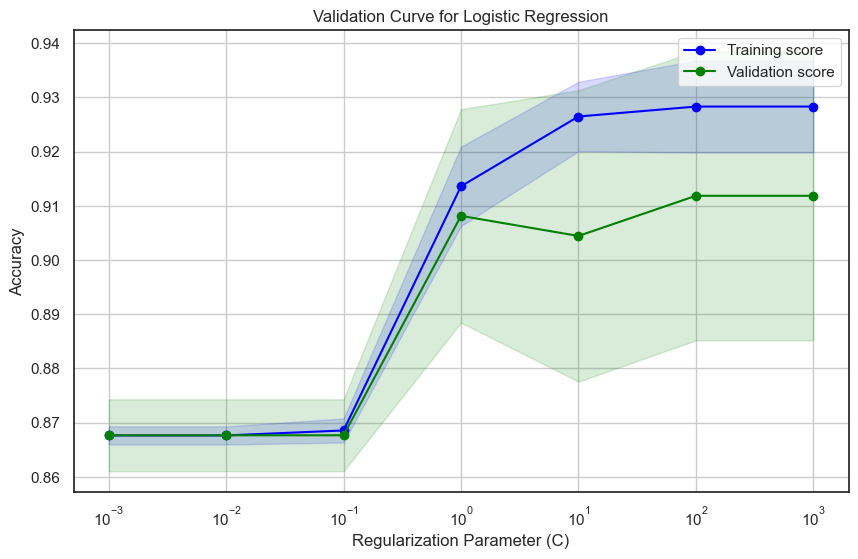

In [42]:
# Define a range of values for the regularization parameter C
param_range = np.logspace(-3, 3, 7)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Generate a validation curve for the logistic regression model
train_scores, valid_scores = validation_curve(
    logreg_model, X, y, param_name="C", param_range=param_range, cv=5
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.15,
    color="blue",
)

plt.plot(param_range, valid_mean, label="Validation score", color="green", marker="o")
plt.fill_between(
    param_range,
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.15,
    color="green",
)

plt.title("Validation Curve for Logistic Regression")
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.legend(loc="best")
plt.grid(True)
plt.show()


The curve illustrates the impact of different regularization parameter values on training and validation accuracy. The plot is displayed with blue markers representing training scores and green markers representing validation scores. The shaded areas around the lines indicate the standard deviation. The x-axis is on a logarithmic scale to better visualize a wide range of parameter values.

The plot reveals a typical pattern seen in validation curves, where training accuracy tends to increase as the model overfits, while validation accuracy plateaus or even decreases. The optimal regularization parameter seems to lie within the explored range, where both training and validation scores are balanced.

### 7.2 Model Evaluation Matrix

The Logistic Regression model is evaluated using various metrics

In [43]:


# Make predictions on the test set
LogisticRegression_preds = LogisticRegression_model.predict(Xtest)

# Calculate and print accuracy
LogisticRegression_accuracy = accuracy_score(ytest, LogisticRegression_preds)
print(f"Accuracy: {LogisticRegression_accuracy:.2f}")

# Calculate and print precision
LogisticRegression_precision = precision_score(ytest, LogisticRegression_preds)
print(f"Precision: {LogisticRegression_precision:.2f}")

# Calculate and print recall
LogisticRegression_recall = recall_score(ytest, LogisticRegression_preds)
print(f"Recall: {LogisticRegression_recall:.2f}")

# Calculate and print F1-score
LogisticRegression_f1 = f1_score(ytest, LogisticRegression_preds)
print(f"F1-Score: {LogisticRegression_f1:.2f}")

# Generate and print confusion matrix
LogisticRegression_conf_matrix = confusion_matrix(ytest, LogisticRegression_preds)
print("Confusion Matrix:")
print(LogisticRegression_conf_matrix)


Accuracy: 0.90
Precision: 0.93
Recall: 0.96
F1-Score: 0.95
Confusion Matrix:
[[ 4  5]
 [ 3 70]]


The accuracy metric represents the overall correctness of the model's predictions. A value of 0.90 indicates that the model correctly predicts lung cancer status for 90% of the test set.

Precision measures the accuracy of the positive predictions made by the model. A precision of 0.93 signifies that 93% of the predicted positive cases (lung cancer) are accurate.

Recall, also known as sensitivity or true positive rate, gauges the ability of the model to correctly identify positive instances. A recall of 0.96 indicates that the model captures 96% of the actual positive cases.

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1-score of 0.95 suggests a well-balanced performance in terms of precision and recall.

The confusion matrix provides a detailed breakdown of the model's predictions. In this case, there are 4 true negatives (TN), 70 true positives (TP), 3 false positives (FP), and 5 false negatives (FN).

In [44]:
# Calculate mean squared error (MSE) and root mean squared error (RMSE) for the Logistic Regression model
mse = mean_squared_error(ytest, LogisticRegression_preds, squared=True)
rmse = mean_squared_error(ytest, LogisticRegression_preds, squared=False)

# Print the results
print("MSE: ", mse)
print("RMSE: ", rmse)


MSE:  0.0975609756097561
RMSE:  0.31234752377721214


MSE measures the average squared difference between the actual and predicted values. A lower MSE value indicates better model performance. In this case, the MSE is relatively low at 0.0976.

RMSE is the square root of MSE, providing a more interpretable measure. An RMSE of 0.3123 suggests that, on average, the model's predictions deviate by approximately 0.3123 from the actual values.

### 8. Summary and Conclusion

The Logistic Regression model exhibits strong performance across multiple metrics, aligning with the project's aim to systematically compare machine learning algorithms. The comprehensive evaluation showcases the model's accuracy, precision, recall, and the balance between them (F1-score). The confusion matrix provides a detailed breakdown of the model's predictive capabilities, indicating that the majority of cases are correctly classified.

The validation curve further contributes to the understanding of the model's behavior, emphasizing the importance of selecting an appropriate regularization parameter. The analysis of MSE and RMSE underscores the model's ability to provide accurate predictions with relatively low error.

In summary, the Logistic Regression model stands out as a robust and well-performing choice for predicting lung cancer based on the provided symptoms. The evaluation results directly relate to the project's objectives, demonstrating the model's potential to be part of a user-friendly system for assessing the risk of developing lung cancer.